In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import numpy as np

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

1. 내적 일관성 분석 (크론바흐 알파)
Cronbach's Alpha: 0.8234
Cronbach's Alpha for 어휘: 0.5784
Cronbach's Alpha for 문법: 0.5422
Cronbach's Alpha for 쓰기: 0.1294
Cronbach's Alpha for 읽기: 0.2888
Cronbach's Alpha for 문화: 0.5458

2. 테스트-재테스트 신뢰도 분석
재테스트 데이터가 없어 테스트-재테스트 신뢰도 분석을 수행할 수 없습니다.

3. 구인 타당도 분석


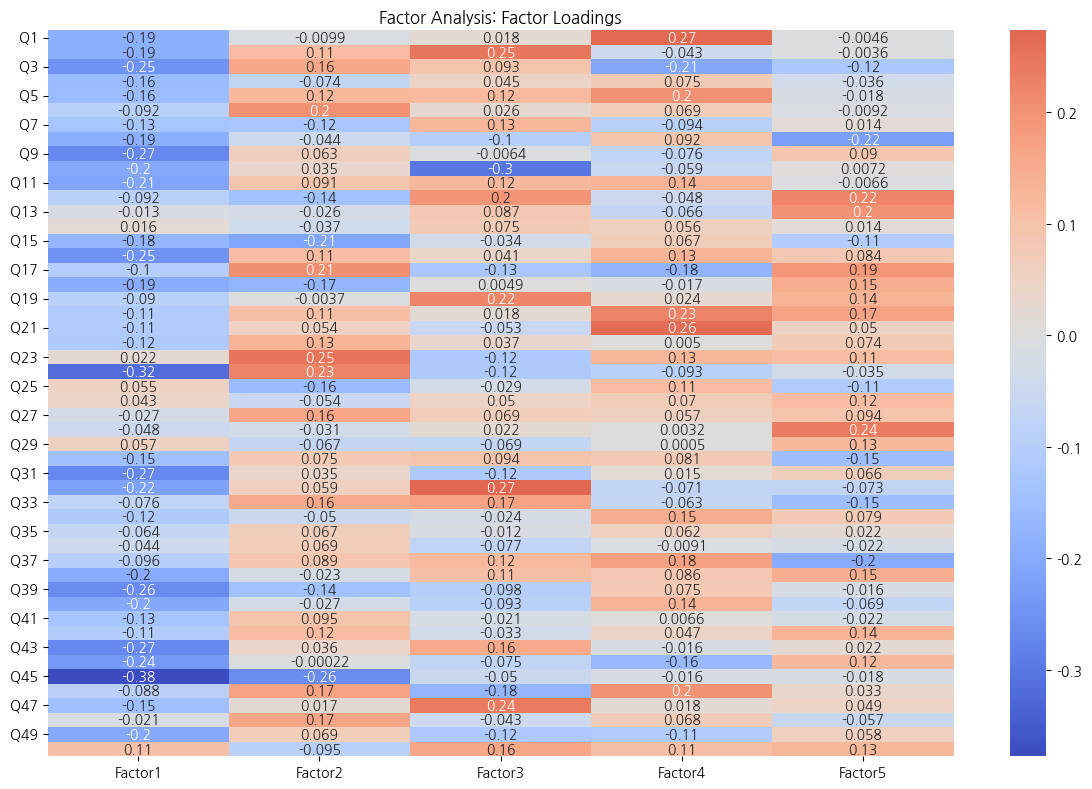

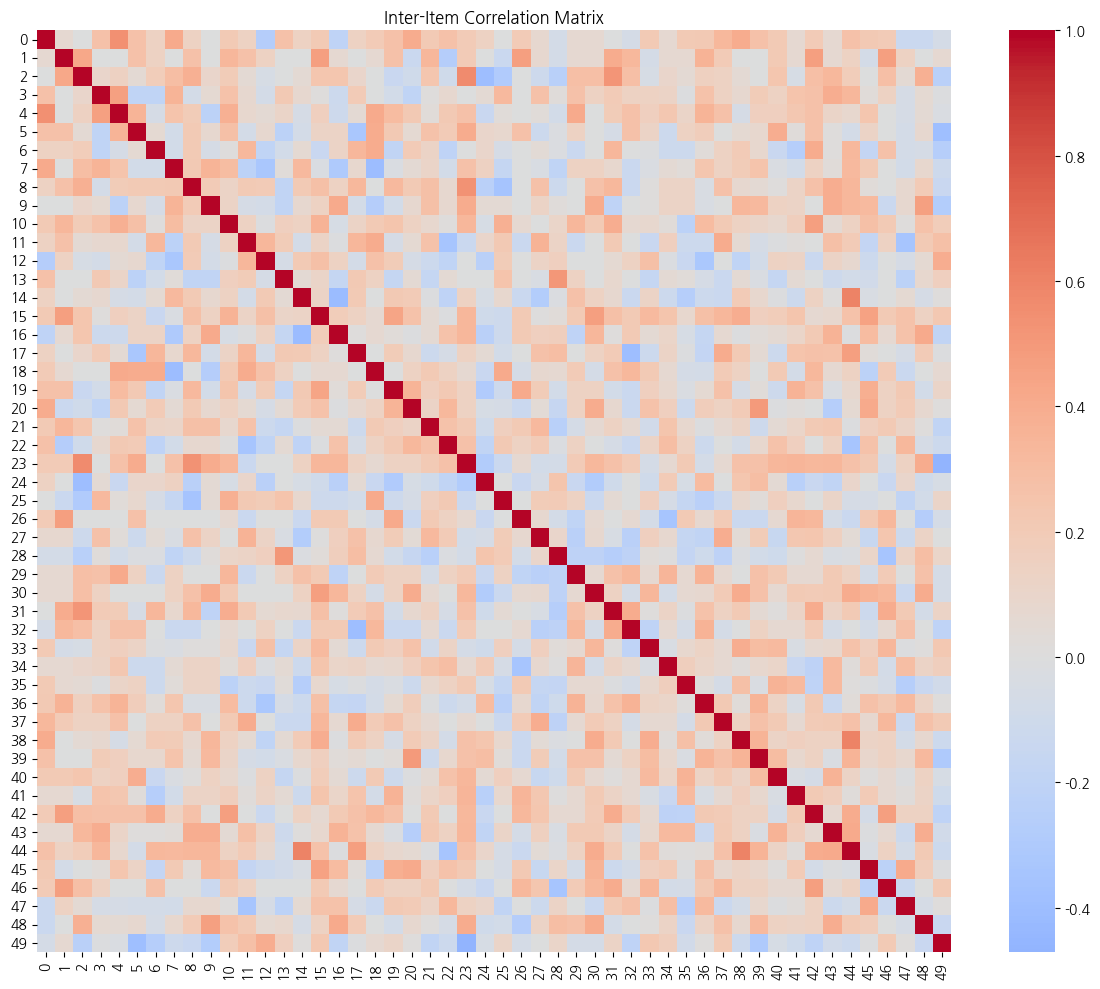


4. 준거 타당도 분석
외부 기준 데이터가 없어 준거 타당도 분석을 수행할 수 없습니다.


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df_questions = pd.read_csv('../exam1.csv')
# 수험자응답정보
df_responses = pd.read_csv('../응답_데이터.csv')

# 응답 데이터 준비
responses = df_responses['OX리스트'].apply(lambda x: pd.Series([1 if i == 'O' else 0 for i in x]))

# 1. 크론바흐 알파 계수를 통한 내적 일관성 분석
def cronbach_alpha():
    item_count = responses.shape[1]
    item_variances = responses.var(axis=0)
    total_variance = responses.sum(axis=1).var()
    
    alpha = (item_count / (item_count - 1)) * (1 - (item_variances.sum() / total_variance))
    
    print(f"Cronbach's Alpha: {alpha:.4f}")
    
    # 영역별 크론바흐 알파 계수 계산
    for area in df_questions['평가영역'].unique():
        area_questions = df_questions[df_questions['평가영역'] == area]['문제번호']
        area_responses = responses.iloc[:, area_questions - 1]
        
        item_count = area_responses.shape[1]
        item_variances = area_responses.var(axis=0)
        total_variance = area_responses.sum(axis=1).var()
        
        area_alpha = (item_count / (item_count - 1)) * (1 - (item_variances.sum() / total_variance))
        print(f"Cronbach's Alpha for {area}: {area_alpha:.4f}")

# 2. 테스트-재테스트 신뢰도 분석 (데이터 있을 경우)
def test_retest_reliability(retest_data=None):
    if retest_data is None:
        print("재테스트 데이터가 없어 테스트-재테스트 신뢰도 분석을 수행할 수 없습니다.")
        return
    
    # 재테스트 데이터가 있다고 가정하고 상관계수 계산
    correlation, _ = stats.pearsonr(df_responses['점수'], retest_data['점수'])
    print(f"Test-Retest Reliability (Pearson correlation): {correlation:.4f}")

# 3. 구인 타당도 분석
def construct_validity():
    # 요인 분석을 통한 구인 타당도 분석
    fa = FactorAnalysis(n_components=5, random_state=42)
    fa.fit(responses)
    
    loadings = pd.DataFrame(fa.components_.T, columns=[f'Factor{i+1}' for i in range(5)])
    loadings.index = [f'Q{i+1}' for i in range(responses.shape[1])]
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
    plt.title('Factor Analysis: Factor Loadings')
    plt.tight_layout()
    plt.show()
    
    # 상관 행렬을 통한 구인 타당도 분석
    correlation_matrix = responses.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
    plt.title('Inter-Item Correlation Matrix')
    plt.tight_layout()
    plt.show()

# 4. 준거 타당도 분석 (외부 기준이 있을 경우)
def criterion_validity(external_criterion=None):
    if external_criterion is None:
        print("외부 기준 데이터가 없어 준거 타당도 분석을 수행할 수 없습니다.")
        return
    
    # 외부 기준이 있다고 가정하고 상관 분석 및 회귀 분석 수행
    correlation, _ = stats.pearsonr(df_responses['점수'], external_criterion)
    print(f"Criterion Validity (Pearson correlation): {correlation:.4f}")
    
    # 단순 선형 회귀 분석
    X = df_responses['점수'].values.reshape(-1, 1)
    y = external_criterion
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    print(f"Regression coefficient: {model.coef_[0]:.4f}")
    print(f"R-squared: {model.score(X_test, y_test):.4f}")
    
    # 산점도 및 회귀선
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5)
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    plt.xlabel('Test Score')
    plt.ylabel('External Criterion')
    plt.title('Criterion Validity: Test Score vs External Criterion')
    plt.tight_layout()
    plt.show()

# 분석 실행
print("1. 내적 일관성 분석 (크론바흐 알파)")
cronbach_alpha()

print("\n2. 테스트-재테스트 신뢰도 분석")
test_retest_reliability()  # 재테스트 데이터가 없으므로 메시지만 출력됨

print("\n3. 구인 타당도 분석")
construct_validity()

print("\n4. 준거 타당도 분석")
criterion_validity()  # 외부 기준 데이터가 없으므로 메시지만 출력됨